In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'errorbar.capsize': 3})
plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 20})
import pandas as pd
from rdkit import Chem

df = pd.read_csv('data/NIST_WTT_CHO_molecules_with_stereoisomers.csv')

In [2]:
print(len(df[df.inchikey.str.contains('UHFFFAOYSA')].inchikey.unique()),
len(df[~df.inchikey.str.contains('UHFFFAOYSA')].inchikey.unique()))

7400 1106


In [3]:
example_5_molecules =  ['RKOBSWOINQPKNE-UHFFFAOYSA-N',
                        'UWHZIFQPPBDJPM-BQYQJAHWSA-N',
                        'FBCQUCJYYPMKRO-UHFFFAOYSA-N',
                        'YVBCULSIZWMTFY-UHFFFAOYSA-N',
                        'HANKSFAYJLDDKP-UHFFFAOYSA-N'
                       ]

df_5_molecules = df[df.inchikey.isin(example_5_molecules)]

Text(0, 0.5, 'Heat of Vaporization (kJ/mol)')

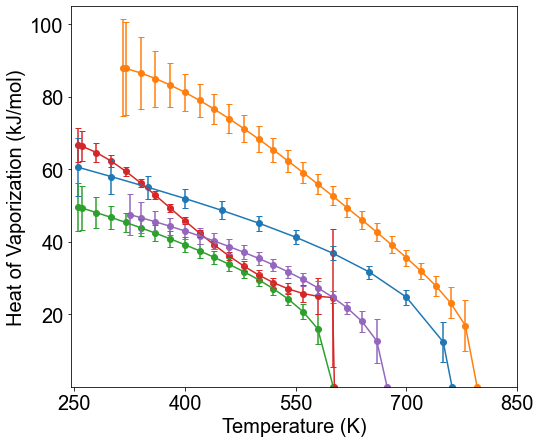

In [4]:
fig,ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(8)
ax.set_xlim([245,850])
ax.set_ylim([0,105])
ax.set_xticks(np.arange(250,851,150))
ax.set_yticks(np.arange(20,101,20))

for ikey in example_5_molecules:
    #print(ikey)
    df = df_5_molecules[df_5_molecules.inchikey == ikey].sort_values(by=['temperature'], ascending = True)

    plt.scatter(df['temperature'], df['HoV (kJ/mol)'])
    plt.errorbar(df['temperature'], df['HoV (kJ/mol)'], yerr=df['Error'])

plt.xlabel('Temperature (K)')
plt.ylabel('Heat of Vaporization (kJ/mol)')

#plt.legend(loc='upper right')